# Metrics III - PS III
## Marius
#### Question 1) aka Question 3)

In [1]:
using Random, Distributions, Plots, StatsFuns

In [2]:
F = 0.78
mu = 0.01
sigma_w= 7.8*(10)^(-5)
sigma_v =1.7*(10)^(-3)

0.0017000000000000003

In [3]:
Random.seed!(1234) # set seed
xi = zeros(100)
y = zeros(100)
var_v = Normal(0, sigma_v)
var_w = Normal(0, sigma_w)
xi[1] = sigma_v/(1-F^2)

for t in 1:100-1
    xi[t+1] = F*xi[t] + rand(var_v) # state equation
    y[t+1] = mu + xi[t+1] + rand(var_w) # observation equation
end

In [39]:
# Question c)

T =100
H = 1
A = 1
F= 0.78
l = zeros(T)
y_hat=zeros(T)
ex_hat=zeros(T)
P=zeros(T)
K=zeros(T)      
P[1]=sigma_v/(1-F^2)
y_hat[1]=1*mu
ex_hat[1]=0

for t in 1:T-1    
    K[t]=(F*P[t]*H)*(H'*P[t]*H + sigma_w)^-1
    P[t+1]=(F-K[t]*H')*P[t]*(F'-H*K[t]')+ K[t]*sigma_w*K[t]'+ sigma_v
    ex_hat[t+1]=F*ex_hat[t]+K[t]*(y[t]-A*mu-H*ex_hat[t])
    y_hat[t+1]=A'*mu +H'*ex_hat[t+1]
    l[t+1] = normlogpdf(ex_hat[t+1], sqrt(H'*P[t+1]*H + sigma_w), y[t])
end 


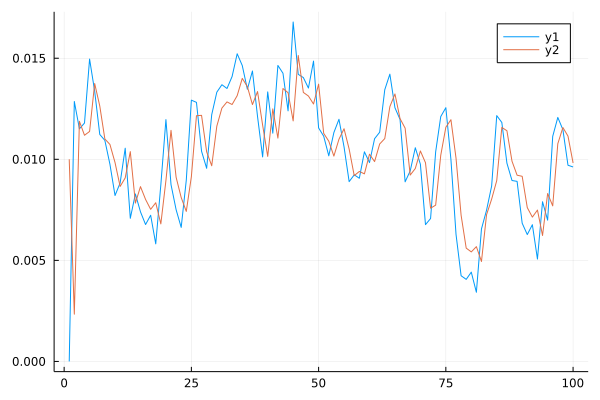

In [5]:
plot(1:100, [y y_hat])

### Kalman filter for $\xi_t$ and $\hat{\xi_t}$

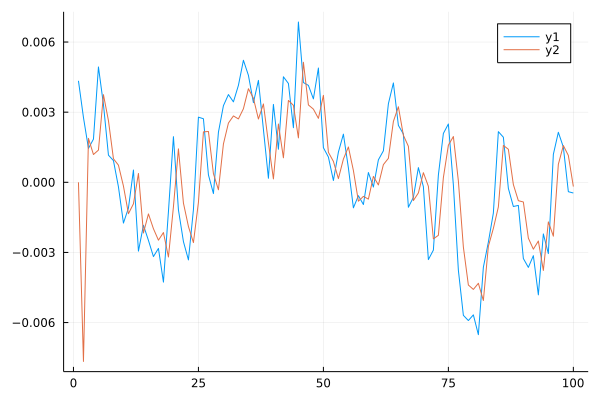

In [59]:
plot(1:100, [xi ex_hat])

### Find optimal parameters via grid-search

In [47]:
xi_2 = zeros(1000)
y_2 = zeros(1000)
var_v = Normal(0, sigma_v)
var_w = Normal(0, sigma_w)
xi_2[1] = sigma_v/(1-F^2)

for t in 1:1000-1
    xi_2[t+1] = F*xi_2[t] + rand(var_v) # state equation
    y_2[t+1] = mu + xi_2[t+1] + rand(var_w) # observation equation
end




T = 15
F_grid = LinRange(0.1*F, 1.9*F, T)
mu_grid = LinRange(0.1*mu, 1.9*mu, T)
v_grid = LinRange(0.1*sigma_v, 1.9*sigma_v, T)
w_grid = LinRange(0.1*sigma_w, 1.9*sigma_w, T)

L = [zeros(T^4) zeros(T^4) zeros(T^4) zeros(T^4) zeros(T^4)]

for f in 1:T
        
    F = copy(F_grid[f])
    
    for mu_ in mu_grid
        
        for _sigma_v in v_grid
            
            for _sigma_w in w_grid
                
                T_kal = 1000
                x = copy(mu)
                l = zeros(T_kal)
                y_hat = zeros(T_kal)
                xi_hat = zeros(T_kal)
                P = zeros(T_kal)
                K = zeros(T_kal)      
                P[1] = _sigma_v/(1-F^2)
                y_hat[1] = 1*x[1]
                xi_hat[1] = 0
    
                for t in 1:T_kal-1
                    
                    K[t] = (F*P[t]*H) * (H'*P[t]*H + _sigma_w)^(-1)
                    P[t+1] = (F-K[t]*H') * P[t] * (F'-H*K[t]') + K[t] * _sigma_w * K[t]' + _sigma_v
                    xi_hat[t+1] = F * xi_hat[t] + K[t] * (y_2[t]-A*mu_-H*xi_hat[t])
                    y_hat[t+1] = A' * mu_ + H' * xi_hat[t+1]
                    l[t+1] = normlogpdf(xi_hat[t+1], sqrt(H'*P[t+1]*H + _sigma_w), y_2[t])
                
                end
    
            L[f,1] = sum(l)
            L[f,2] = F
            L[f,3] = mu_
            L[f,4] = sigma_v
            L[f,5] = sigma_w
            
            end
        end
    end
    println(f)
end

1
2
3
4
5
6
7
8
9
10
11
12
13
14


LoadError: DomainError with -0.00726679553515668:
sqrt will only return a complex result if called with a complex argument. Try sqrt(Complex(x)).

In [55]:
argmax(L), L[15,:]

(CartesianIndex(15, 1), [2808.9756767895124, 1.482, 0.001, 0.0017000000000000003, 7.800000000000001e-5])

In [56]:
# Optimal parameters
F_2 = 1.482
mu_2 = 0.001
sigma_v_2 = 0.0017
sigma_w_2 = 0.000078

7.8e-5

### Set up general Function of Kalman

In [64]:
function Kalman(H=1, A=1, R=sigma_w_2, F=F_2, Q=sigma_v_2, T=100, y=y, mu=mu_2)
    
    y_hat=zeros(T)
    ex=zeros(T)
    P=zeros(T)
    K=zeros(T)
    
    P[1]=Q/(1-F^2)
    y_hat[1]=A*mu
    ex[1]=0
    
    for t in 1:T-1 
        
         K[t]=F*P[t]*H*(H'*P[t]*H+R)^(-1)
         P[t+1]=(F-K[t]*H')*P[t]*(F-H*K[t])'+K[t]*R*K[t]'+Q
         ex[t+1]=F*ex[t]+K[t]*(y[t]-A*mu-H*ex[t])
         y_hat[t+1]=A'*mu +H'*ex[t+1]
        
    end 
    
    return P, ex, y_hat;
    
end

Kalman (generic function with 9 methods)

In [65]:
Kalman()

([-0.0014210197237537654, 0.0018812628170287592, 0.0018644931378659461, 0.0018644342591708064, 0.0018644340506554875, 0.0018644340499170207, 0.0018644340499144054, 0.001864434049914396, 0.001864434049914396, 0.001864434049914396  …  0.001864434049914396, 0.001864434049914396, 0.001864434049914396, 0.001864434049914396, 0.001864434049914396, 0.001864434049914396, 0.001864434049914396, 0.001864434049914396, 0.001864434049914396, 0.001864434049914396], [0.0, -0.0015680717068822392, 0.016783372732930003, 0.015944784975281234, 0.016301258418162743, 0.0208257612820204, 0.01882908959318079, 0.015672177694630276, 0.015067281573980676, 0.01334385800387981  …  0.009016198051599237, 0.008041636041763158, 0.00867738127527869, 0.006295640331022097, 0.010190020409441893, 0.009125188899845062, 0.014958645037145713, 0.016638567811119703, 0.01587908136797964, 0.013329166625734423], [0.001, -0.0005680717068822392, 0.017783372732930004, 0.016944784975281235, 0.017301258418162744, 0.0218257612820204, 0.01

### Plot after grid-search, changes are minimal

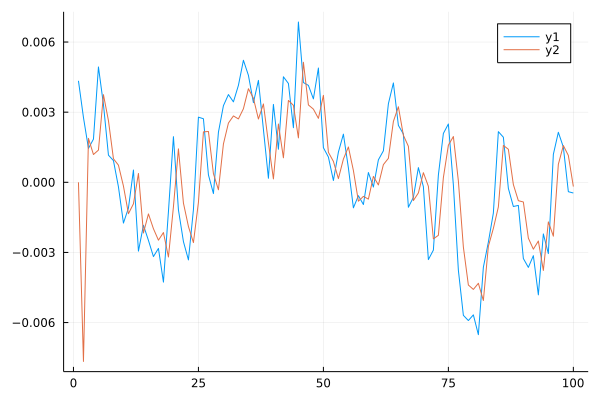

In [63]:
plot(1:100, [xi, ex])